In [1]:
import numpy as np
import pystan
import arviz as az

from data_generation import get_sample_data, INTERCEPT_TRUE, BETA_TRUE, SIGMA_TRUE
from model_compilation import load_compiled_stan_model
from data_compression import get_input_data_for_stan_model

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
/opt/conda/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/conda/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Generate Dummy Data
np.random.seed(1234)

n_samples = 1_000_000  # original number of observations
n_feature_values = 4  # number of distinct feature values per feature

df = get_sample_data(n_samples, n_feature_values)

In [3]:
df.head()

,x0,x1,x2,y
0,3,3,2,7.137917
1,1,0,0,1.945393
2,0,1,3,-1.085533
3,1,3,1,6.466830
4,2,2,3,3.576979


In [4]:
def get_fit(formula, df):
    stan_data = get_input_data_for_stan_model(formula, df)
    sm = load_compiled_stan_model('linear_regression.stan')
    fit = sm.sampling(data=stan_data, iter=2000, chains=4, seed=123, verbose=False)
    return fit

In [5]:
fit = get_fit('y ~ 1 + x0 + x1 + x2', df)

Stan model loaded from lm_model_774164710.pkl


Gradient evaluation took 6.4e-05 seconds
Gradient evaluation took 5.3e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.64 seconds.
Adjust your expectations accordingly!


1000 transitions using 10 leapfrog steps per transition would take 0.53 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.000215 seconds
1000 transitions using 10 leapfrog steps per transition would take 2.15 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:    1 / 2000 [  0%]  (Warmup)

Gradient evaluation took 4.4e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.44 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  200 / 200

In [6]:
INTERCEPT_TRUE, BETA_TRUE, SIGMA_TRUE

(0.3, array([ 1.,  2., -1.]), 0.5)

In [7]:
fit

Inference for Stan model: anon_model_1b841a0b821361327974e16f7afbc4d1.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
beta[1]    0.3  3.5e-5 1.2e-3    0.3    0.3    0.3    0.3    0.3   1180    1.0
beta[2]    1.0  9.0e-6 4.3e-4    1.0    1.0    1.0    1.0    1.0   2293    1.0
beta[3]    2.0  8.6e-6 4.3e-4    2.0    2.0    2.0    2.0    2.0   2511    1.0
beta[4]   -1.0  8.3e-6 4.3e-4   -1.0   -1.0   -1.0   -1.0   -1.0   2689    1.0
sigma      0.5  6.3e-6 3.5e-4    0.5    0.5    0.5    0.5    0.5   3185    1.0
lp__    -7.3e5    0.04   1.52 -7.3e5 -7.3e5 -7.3e5 -7.3e5 -7.3e5   1886    1.0

Samples were drawn using NUTS at Sun Aug 25 14:58:42 2024.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

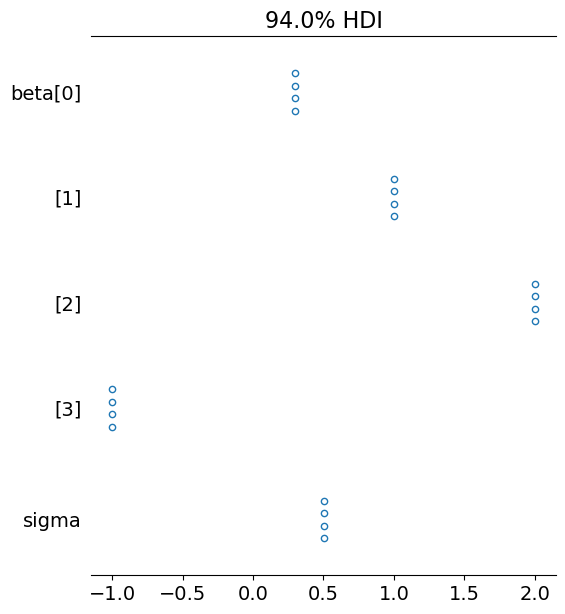

In [8]:
_ = az.plot_forest(fit)